# <p style="background-color:gray; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 10px 100px; color:black; hight:max"> Upvote my work if you found it useful.🎯 </p>

# <p style="background-color:#CCE3F2; font-family:newtimeroman; font-size:175%; text-align:center; border-radius: 15px 50px;">CommonLit Readability Prize 📖</p>



<img src="https://image.slidesharecdn.com/80edc8ea-6538-4fab-a6b6-fb2c9714fd24-160328160353/95/contentreadability-1-638.jpg?cb=1459181240" alt="Readability" hight=50 width=800></img>

------------------------------------------
------------------------------------------


<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 500px;"><b>Introduction</b></p>
The objective of this project is to build a Machine Learning model to rate the complexity of reading passages for grade 3-12 classroom use based on pattern extracted from analysing 6 descriptive features.<br>
<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 500px;"><b>We have 79 descriptive features:</b></p>
<ul>
    <li>id : unique ID for excerpt.</li>
    <li>url_legal : URL of source.</li>
    <li>license : license of source material.</li>
    <li>excerpt : text to predict reading ease of.</li>
    <li>target : reading ease</li>
    <li>standard_error : measure of spread of scores among multiple raters for each excerpt.</li>  
</ul>
<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 100px;"><b>Outline:</b></p>
<ul>
    <li><a href="#Phase I"><b>Phase I</b></a>
        <ul>
            <li><a href="#head-1">Data Pre-processing</a>
            <li><a href="#head-2">EDA</a>

### <b>Installing and importing packages</b>

In [1]:
# We gonna use these packages for our analysis.

# importing
import os
import re
import pandas as pd
import matplotlib as plt
import seaborn as sns
import itertools
import nltk 
import string
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.figure_factory as ff 
from plotly.offline import iplot
from plotly import tools
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# see our files:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/commonlitreadabilityprize/sample_submission.csv
/kaggle/input/commonlitreadabilityprize/train.csv
/kaggle/input/commonlitreadabilityprize/test.csv


### <h3>Reading Data</h3>
Downloading and reading dataset from Kaggle. Right now, only considering 2834 rows for the exploration.

In [3]:
#reading data
train = pd.read_csv('/kaggle/input/commonlitreadabilityprize/train.csv')
test = pd.read_csv('/kaggle/input/commonlitreadabilityprize/test.csv')

In [4]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [5]:
test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [6]:
train.shape

(2834, 6)

In [7]:
test.shape

(7, 4)

<a id="head-1"></a>
<a id="head-1-3"></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">Data Preprocessing 🔧</p>
There are various tasks that need to perform in data processing like lowercasing, removing stop words, removing digits, removing URLs, HTML tags and many more.<br>
For basic cleaning and lemmatization, I am using the texthero and nltk package which offers features related to text preprocessing as well as data exploration. Code is as follows:

In [8]:
#filtering the unwanted symbols, spaces, ....etc
to_replace_by_space = re.compile('[/(){}\[\]|@,;]')
punctuation = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
bad_symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def text_prepare(text):
    '''
    text: a string
    returna modified version of the string
    '''
    text = text.lower() # lowercase text
    text = re.sub(punctuation, '',text)
    text = re.sub(to_replace_by_space, " ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(bad_symbols, "", text)         # delete symbols which are in BAD_SYMBOLS_RE from text
    text = " ".join([word for word in text.split(" ") if word not in stopwords]) # delete stopwords from text
    text = re.sub(' +', ' ', text)
    return text

In [9]:
train['excerpt'] = train['excerpt'].apply(text_prepare)

<a id="head-2"></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">Data Exploration and Analysis 🔍</p>
<p>It is important to know enough insights about your data before implementing any machine learning model or performing statistical hypothesis testing. Exploratory data analysis provide that insight about the data to you.
In this article, we will be discussing the respective python packages available and different exploratory task in the natural language processing domain one should perform.
    <b>So, let's start.....

In [10]:
# lets define a function to plot a bar plot easily

def bar_plot(df,x,x_title,y,title,colors=None,text=None):
    fig = px.bar(x=x,
                 y=y,
                 text=text,
                 labels={x: x_title.title()},          # replaces default labels by column name
                 data_frame=df,
                 color=colors,
                 barmode='group',
                 template="simple_white",
                 color_discrete_sequence=px.colors.qualitative.Prism)
    
    texts = [df[col].values for col in y]
    for i, t in enumerate(texts):
        fig.data[i].text = t
        fig.data[i].textposition = 'inside'
        
    fig['layout'].title=title

    for trace in fig.data:
        trace.name = trace.name.replace('_',' ').title()

    fig.update_yaxes(tickprefix="", showgrid=True)

    fig.show()

In [11]:
# lets define a function to plot a histogram plot easily

def hist_plot(df,x,title):
    fig = px.histogram(x=df[x],
                       color_discrete_sequence=colors,
                       opacity=0.8)

    fig['layout'].title=title
    fig.update_yaxes(tickprefix="", showgrid=True)
    fig.show()

> ### Target 

In [12]:
title='Target distribution'
hist_plot(train, 'target' ,title)

> ### standard error

In [13]:
title='Standard error distribution'
hist_plot(train, 'standard_error' ,title)

> ### License

In [14]:
temp = train['license'].dropna()
temp = temp.value_counts().to_frame().reset_index()
title = 'Unique licenses count'
bar_plot(temp, 
         'index',
         'License',
         ['license'],
          title=title)

> ### Url legal

In [15]:
# Using this iteratively I was able to get a full list of titles.
url_unique_list = train['url_legal'].dropna().apply(lambda x : re.findall('https?://([A-Za-z_0-9.-]+).*',x)[0]).unique()
url_unique_list

array(['simple.wikipedia.org', 'en.wikipedia.org', 'kids.frontiersin.org',
       'www.africanstorybook.org', 'www.ck12.org', 'freekidsbooks.org',
       'www.commonlit.org', 'emedia.uen.org', 'www.digitallibrary.io',
       'ukuqonda.co.za', 'drive.google.com', 'static.ehe.osu.edu',
       'beyondpenguins.ehe.osu.edu', 'en.wikibooks.org',
       'sites.ehe.osu.edu'], dtype=object)

In [16]:
url_count = {}
for sent in train['url_legal'].dropna().values:
    url = re.findall('https?://([A-Za-z_0-9.-]+).*',sent)[0]
    if url in url_count:
        url_count[url] += 1
    else:
        url_count[url] = 1
    
url_count_df = pd.DataFrame(data=url_count.items())
url_count_df = url_count_df.sort_values(by=1,ascending=False).rename(columns={0:'Site',1:'Count'})
url_count_df

,Site,Count
0,simple.wikipedia.org,196
2,kids.frontiersin.org,191
1,en.wikipedia.org,176
3,www.africanstorybook.org,164
6,www.commonlit.org,41
5,freekidsbooks.org,19
8,www.digitallibrary.io,19
13,en.wikibooks.org,8
11,static.ehe.osu.edu,6
10,drive.google.com,3


In [17]:
title = 'Unique Sites count'
bar_plot(url_count_df, 
         'Site',
         'Site',
         ['Count'],
          title=title)

## Words level analysis

In [18]:
#Find words spreading (each word frequency)
freq_d = pd.Series(' '.join(train['excerpt']).split()).value_counts()
#Plot the words distribution
fig = px.line(freq_d,
              title='The word frequency visualization')
fig.update_layout(showlegend=False) 

In [19]:
prepared_as_text = [line for line in train['excerpt']]
text_prepared_results = '/n'.join(prepared_as_text)

text= ' '.join(t for t in train['excerpt'])
words_list= text.split()

In [20]:
word_freq= {}

for word in set(words_list):
    word_freq[word]= words_list.count(word)
    
#sorting the dictionary 
word_freq = dict(sorted(word_freq.items(), reverse=True, key=lambda item: item[1]))

In [21]:
#sort the data and put it in a data frame for the visualization
word_freq_temp = dict(itertools.islice(word_freq.items(), 25))
word_freq_df = pd.DataFrame(word_freq_temp.items(),columns=['word','count']).sort_values('count',ascending=False)

In [22]:
bar_plot(word_freq_df.reset_index(),
         'word',
         'Words',
         ['count'],
         title='Top 20 frequent words')

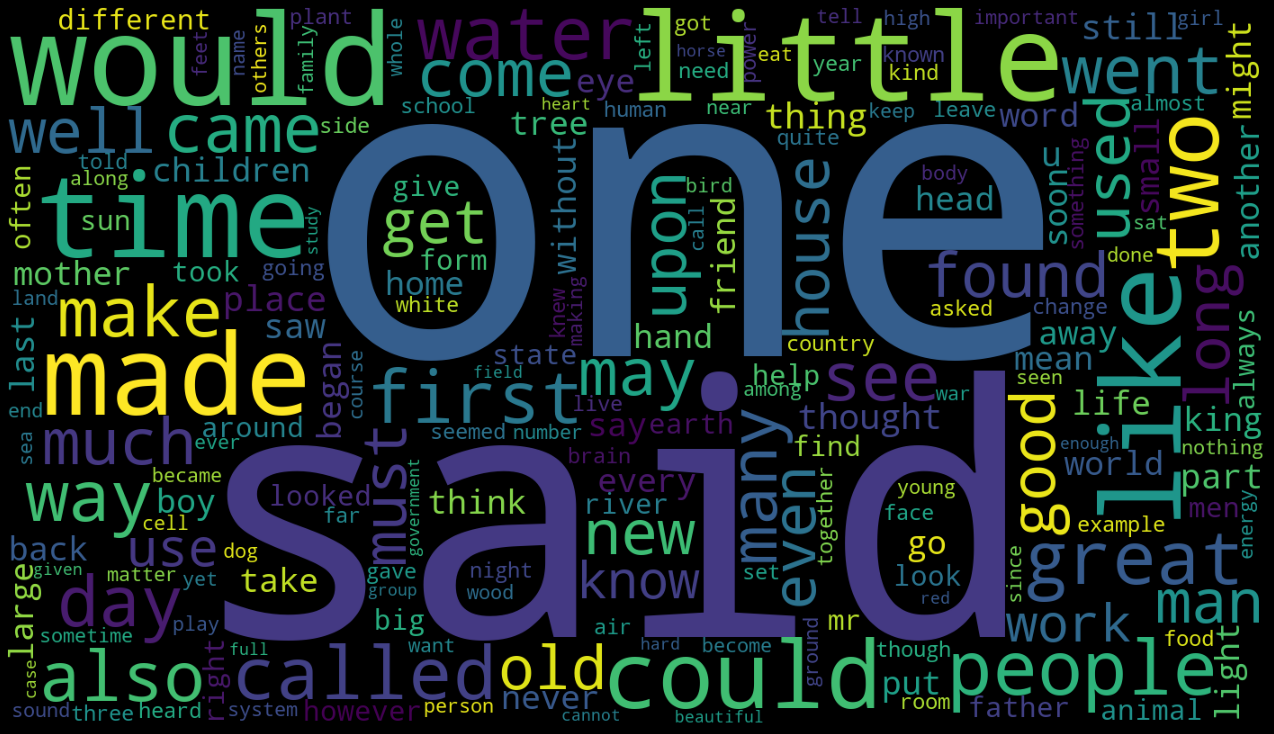

In [23]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1400, 
                          height=800,
                          random_state=2021,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
        wordc = wordcloud.generate(' '.join(text))
    else:
        wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
wordcloud(train['excerpt'],stop)

> ### Bigrams

In [24]:
from nltk.util import ngrams    

def get_n_grans_count(text, n_grams, min_freq):
    output = {}
    tokens = nltk.word_tokenize(text)

    #Create the n_gram
    if n_grams == 2:
        gs = nltk.bigrams(tokens)
        
    elif n_grams == 3:
        gs = nltk.trigrams(tokens)

    else:
        return 'Only 2_grams and 3_grams are supported'
    #compute frequency distribution for all the bigrams in the text
    fdist = nltk.FreqDist(gs)
    for k,v in fdist.items():
        if v > min_freq:
            index = ' '.join(k)
            output[index] = v
    
    return output

In [25]:
two_grams = get_n_grans_count(text, n_grams=2, min_freq=10)
two_grams_df = pd.DataFrame(data=two_grams.items())
two_grams_df = two_grams_df.sort_values(by=1,ascending=False).rename(columns={0:'Two grams',1:'Count'})
two_grams_df

,Two grams,Count
78,can not,159
10,one day,143
56,united states,96
19,years ago,75
50,could see,57
...,...,...
184,could possibly,11
191,made many,11
194,every morning,11
24,go sleep,11


In [26]:
bar_plot(two_grams_df.iloc[:20],
         'Two grams',
         'Two grams',
         ['Count'],
         title='Top 20 frequent bigram')

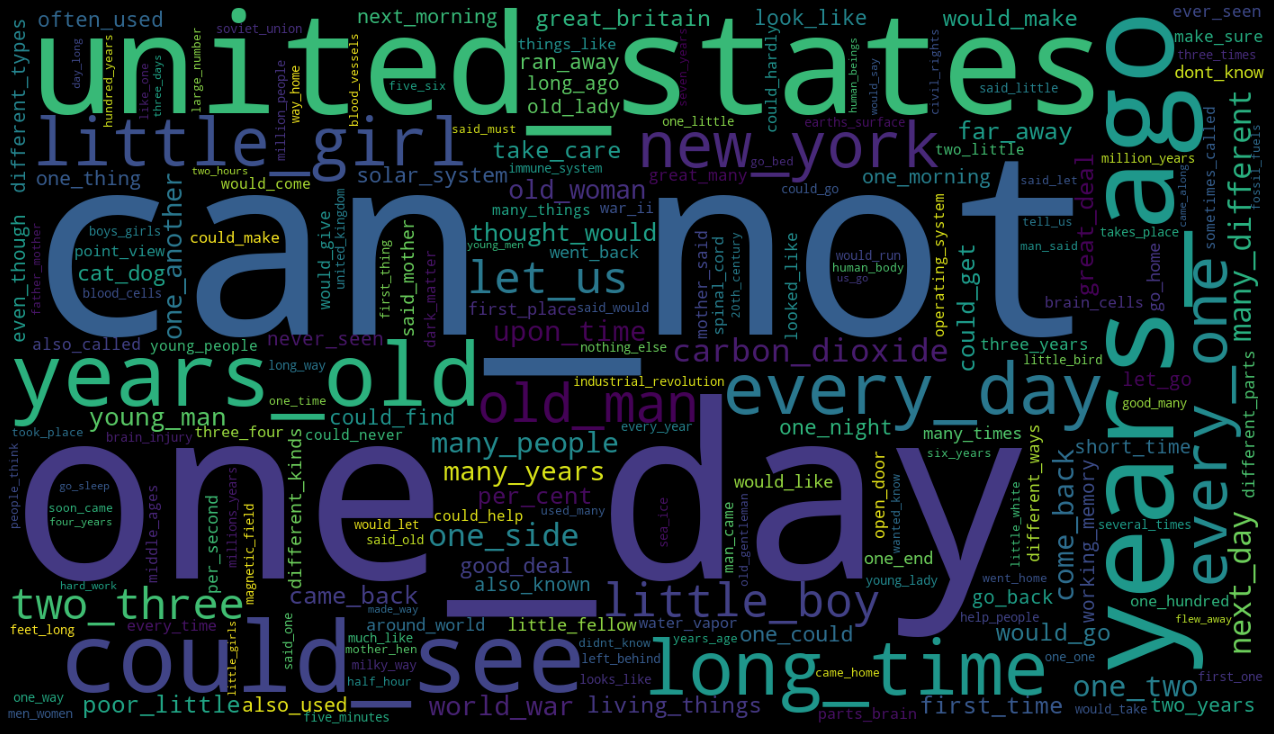

In [27]:
two_grams_temp = {j.replace(' ','_'):k for j,k in two_grams.items()}

wordcloud(two_grams_temp,stop,ngram=2)

> ### Trigrams

In [28]:
three_grams = get_n_grans_count(text, n_grams=3, min_freq=0)
three_grams_df = pd.DataFrame(data=three_grams.items())
three_grams_df = three_grams_df.sort_values(by=1,ascending=False).rename(columns={0:'Three grams',1:'Count'})
three_grams_df

,Three grams,Count
22164,world war ii,16
83228,one two three,10
46922,long time ago,9
39425,traumatic brain injury,9
91429,let us go,9
...,...,...
82614,away closing eyes,1
82615,closing eyes smelling,1
82616,eyes smelling tasting,1
82617,smelling tasting trying,1


In [29]:
bar_plot(three_grams_df.iloc[:20],
         'Three grams',
         'Three grams',
         ['Count'],
         title='Top 20 frequent trigram')

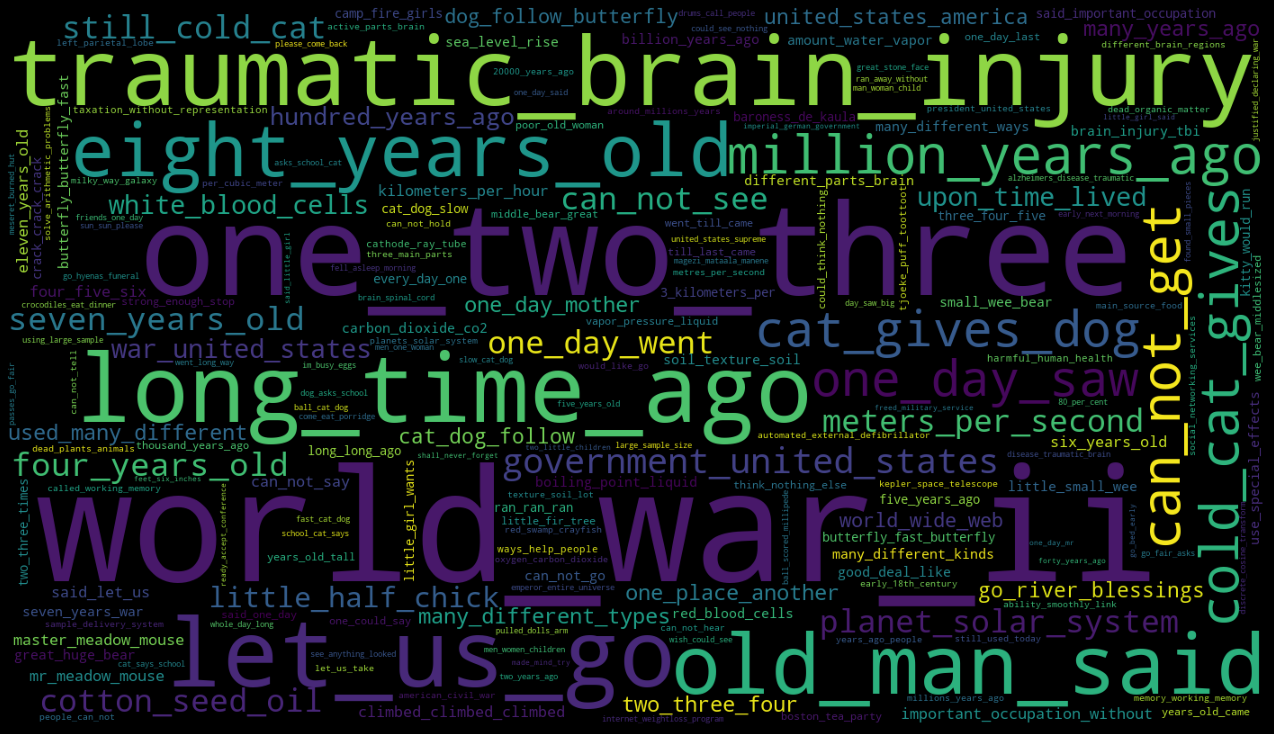

In [30]:
three_grams_temp = {j.replace(' ','_') : k for j, k in three_grams.items()}

wordcloud(three_grams_temp,stop,ngram=3)

> ### Words length

In [31]:
words_length = {}

for word in set(words_list):
    words_length[word] = len(word)
    
words_length = dict(sorted(words_length.items(), reverse=True, key=lambda item: item[1]))
#sort the data and put it in a data frame for the visualization
word_length_temp = dict(itertools.islice(words_length.items(), 25))
words_length_df = pd.DataFrame(words_length.items(),columns=['word','count']).sort_values('count',ascending=False)

In [32]:
hist_plot(words_length_df,
          'count',
          title='Target distribution')

> <b>So most of words have length between 4-11.<br> 
But Wait!, something is weird here. There are words with a length of more than 15. We have to verify, are these actually English words or not?

In [33]:
longer_23 = words_length_df[words_length_df['count'] > 23]
longer_23

,word,count
0,consciousnessenlightenment,26
2,hundredgoinggoinggoinggone,26
3,killykillykillygoatbayayay,26
1,storingretrievalprocessing,26
4,doi101016jiheduc200803001,25
5,cardioverterdefibrillator,25
6,screamwhewewewewbangbroke,25
8,thanksgivingthanksgiving,24
9,cyanobacteriazooplankton,24
7,kilometresnanotechnology,24


<h2>Sentence level analysis</h2><br>
Sentence level analysis Text statistics include sentence length distribution, minimum, maximum, and average length. To check the sentence length distribution. Code and output are as follows:

In [34]:
train['sentence_len']= train['excerpt'].str.len()
print('Max length     : {} \nMin length     : {} \nAverage Length : {}'.\
      format(max(train['sentence_len']),min(train['sentence_len']),train['sentence_len'].mean()))

Max length     : 1049 
Min length     : 306 
Average Length : 617.3959068454482


In [35]:
#the longest sentence we have
train[train['sentence_len']==max(train['sentence_len'])]['excerpt'].values[0]

'environmental science interdisciplinary academic field integrates physical biological information sciences including ecology biology physics chemistry zoology mineralogy oceanology limnology soil science geology atmospheric science geodesy study environment solution environmental problems environmental science emerged fields natural history medicine enlightenment today provides integrated quantitative interdisciplinary approach study environmental systemsrelated areas study include environmental studies environmental engineering environmental studies incorporate social sciences understanding human relationships perceptions policies towards environment environmental engineering focuses design technology improving environmental quality every aspect environmental scientists work subjects like understanding earth processes evaluating alternative energy systems pollution control mitigation natural resource management effects global climate change environmental issues almost always include 

In [36]:
#the shortest sentence we have
train[train['sentence_len']==min(train['sentence_len'])]['excerpt'].values[0]

'yelped pup maid threw hearthbrush headstill one told man came upstairs mess said oh see pup thought knew must come inso know growled pup sore back lame foot crept chaircome come cried man house seized strong hand chained stallyou might stopped played grass stayed man said come house ought must kept cannot'

In [37]:
hist_plot(train,
          'sentence_len',
          title='Sentences lengh distribution with spaces')

> <b>According to distribution, most of the article lengths are in the range of 500–650 and maximum length, minimum length, and average length are 1049, 306, 617.3712.<br>The point to note here is, sentence length includes spaces between word. If you want distribution without space, you can use the below code.

In [38]:
train['sentence_len_no_sp']= train['excerpt'].str.split().map(lambda x: len(x))

hist_plot(train,
          'sentence_len_no_sp',
          title='Sentences lengh distribution without spaces')

### <h2 align="center" style='color:red' > If you liked the notebook or learned something please <b>Upvote</b>! </h2>

<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 100px;">You can also see:</p>
<ul>
<li><b><a href='https://www.kaggle.com/alaasedeeq/house-price-prediction-top-8'>✔ House Price prediction(Top 8%)</a>     
<li><b><a href='https://www.kaggle.com/alaasedeeq/predicting-the-survival-of-titanic-top-6'>Predicting the Survival of Titanic (Top 6%)</a>    
<li><b><a href='https://www.kaggle.com/alaasedeeq/prediction-of-heart-disease-machine-learning'>Prediction of Heart Disease (Machine Learning)</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/data-exploration-and-visualization-uber-data'>Data exploration and visualization(Uber Data)</a><br>
<li><b><a href='https://www.kaggle.com/alaasedeeq/hotel-booking-eda-cufflinks-and-plotly'>Hotel booking EDA (Cufflinks and plotly)
</a><br>
<li><b><a href='https://www.kaggle.com/alaasedeeq/suicide-rates-visualization-and-geographic-maps/edit/run/53135916'>Suicide Rates visualization and Geographic maps</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/superstore-data-analysis-with-plotly-clustering'>Superstore Data Analysis With Plotly(Clustering)</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/superstore-analysis-with-cufflinks-and-pandas'>Superstore Analysis With Cufflinks and pandas</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/learn-data-analysis-using-sql-and-pandas'>Learn Data Analysis using SQL and Pandas</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/european-soccer-database-with-sqlite3'>European soccer database with sqlite3</a>
<li><b><a href='https://www.kaggle.com/alaasedeeq/chinook-questions-with-sqlite'>Chinook data questions with sqlite3</a>

### <h1 align="center" style="color:red ">Thanks for reading</h1>